In [49]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.metrics.cluster import completeness_score,homogeneity_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 30)
np.set_printoptions(linewidth=75,suppress=True)

# 1. Load the Data Set

In [4]:
def load_data(filepath):
    data = []
    with open(filepath, encoding="utf8") as file:
        for line in file:
            data.append(json.loads(line.rstrip()))

    return data

## 1.1 Review Data

In [5]:
reviewdata = load_data('review.json')

In [6]:
len(reviewdata)

4736897

In [7]:
review_df = pd.DataFrame.from_dict(reviewdata)

In [10]:
review_df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w
4,uYHaNptLzDLoV_JZ_MuzUA,0,2013-11-20,0,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0,0xtbPEna2Kei11vsU-U2Mw


### Load the business_id of restaurants in Las Vegas

In [11]:
lv_res_id=np.loadtxt('lv_restaurants_id.txt',dtype=bytes, delimiter="\n").astype(str)

In [12]:
lv_res_id[:10]

array(['LDMCrFlGIFUN6L-FEFgzWg', 'QTH_XGh4rWYdd0fTW-tUDw',
       'DiA78qPtp6rfRNdomzjBbw', 'YTqtM2WFhcMZGeAGA08Cfg',
       'Oto60yDwk1z72WmfWEYrjg', 'mUk-0jToBuzk4KaDXp-uew',
       '1CP8aJa8ILlfM5deroar0Q', 'TYGVaav4hWZioQlk9Ig78A',
       'Wbi-x-1Nbn6LFCMOSN6F5Q', 'W-3Sy3fy85mQdd0ZNFKIiw'], 
      dtype='<U22')

### Sanity Check

In [13]:
review_df[review_df["business_id"]==lv_res_id[0]]

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
105842,LDMCrFlGIFUN6L-FEFgzWg,0,2014-11-26,0,VSpTKm_Z7N9_-6jbbkozmA,2,I've been eating chicken at el poll loco since...,0,yeyeg8Vm4Lxvf4tZqoiKIA
105843,LDMCrFlGIFUN6L-FEFgzWg,0,2015-06-26,0,4gH-5f0ewrH2Vvl0UYtQQA,1,I'm at training for work and went for a quick ...,0,GLGz9sSNHIbguwv90XStYA
105844,LDMCrFlGIFUN6L-FEFgzWg,1,2014-05-27,0,1qBsRv6joCOCZzs8BGKk0w,4,Newly decorated. Great chicken. Ordering could...,0,rcwQ0ubBNHRGdqjbQQ-Usg
105845,LDMCrFlGIFUN6L-FEFgzWg,2,2015-06-18,1,qlnMpBo8_GWhlJE6zR51qA,3,Given this location is close to my work I find...,2,YxqLJwDgcL4OoDB1hN-Ikg
105846,LDMCrFlGIFUN6L-FEFgzWg,0,2014-11-25,0,FdsAx-XpgfWzLHUDJWZTzw,3,Food is good prices are good and service was g...,0,6ouNbGA50B7WUUhZuOy0Cw
105847,LDMCrFlGIFUN6L-FEFgzWg,0,2015-05-15,0,woYGBjLlsrezUvBKiBwwhg,1,Never again will I return. The culture of thi...,0,i1zH7hGJs_accdfjEzrwUQ
105848,LDMCrFlGIFUN6L-FEFgzWg,0,2017-02-15,0,_u6u4NB9XTNPgDOqJUbF7Q,5,this one is one of my favorite locations . Foo...,0,5TRDoYHqVvC81mq_p76HlQ
105849,LDMCrFlGIFUN6L-FEFgzWg,0,2015-06-16,0,ilj0ZswUKjNMjw2kz7cgTg,4,A great mix between an authentic Mexican taco ...,0,Pg-sMoiilKCVPs41vf5V_Q
105850,LDMCrFlGIFUN6L-FEFgzWg,0,2017-06-05,0,lQQ7DaHdAxtVvZXf2YoTBg,1,Do not go to this el pollo loco! They rude as ...,0,wJ7yczc2Eqw9Fqr4rNBnqw
105851,LDMCrFlGIFUN6L-FEFgzWg,1,2015-07-20,1,gSDvkkVS7C0exFEik8RF8A,4,Quick. Fast. Fresh and always Delicious!\nThis...,1,Wdm3hCNmJwD689wD6-Bb0w


### Create a sub set that only contains reviews for the restaurants in Las Vegas

In [14]:
lv_res_review=review_df[review_df["business_id"].isin(lv_res_id)]

In [15]:
lv_res_review.shape

(849883, 9)

In [16]:
lv_res_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
482,OQcvO5P3gH0cuJ-bPXwfQQ,0,2017-04-01,0,BLIJFaJZ-_fOcBs16fL_6g,5,"Loved, Loved, Loved. It is a simple place, but...",0,jgzD7eBwZrasqy6wUy122w
483,OQcvO5P3gH0cuJ-bPXwfQQ,0,2016-11-05,0,VuKbGklNbOESJSx76_EjyA,5,Is a small restaurant food is good! Also the o...,0,2v_meK453YAWXz4NjJ9abA
484,OQcvO5P3gH0cuJ-bPXwfQQ,0,2017-06-01,0,HBaAmcS9zp5rY1qiMuWygA,5,Best Mexican restaurant in Vegas. Meat is supe...,1,cdFWtOgA1PAkNYkiwzUJbQ
485,OQcvO5P3gH0cuJ-bPXwfQQ,0,2017-07-16,0,41ORR2OPi2CP0FAoiWjwWA,5,I would've like to take a before picture when...,1,60ENRcuFKNf9oeA2zWROFQ
486,OQcvO5P3gH0cuJ-bPXwfQQ,67,2017-06-20,42,Oxz26pqpIb7dDVeuUzNZlg,4,We had originally planned on eating at the Sin...,66,Fv0e9RIV9jw5TX3ctA1WbA


In [17]:
lv_res_review=lv_res_review.set_index('business_id')

## 1.2 User Data

In [18]:
userdata = load_data('user.json')

In [20]:
len(userdata)

1183362

In [19]:
user_df = pd.DataFrame.from_dict(userdata)

In [22]:
pd.set_option('display.max_columns', None)

In [20]:
user_df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,569,1834,16856,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,74,402,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18
2,4.72,15,1,15,5,0,1,11,8,20,0,1,55,[],17,"[Oa84FFGBw1axX8O6uDkmqg, SRcWERSl4rhm-Bz9zN_J8...",4,Gabe,277,45,-lGwMGHMC_XihFJNKCJNRg,2014-10-31
3,3.76,9,0,9,1,0,1,4,1,11,0,3,4,"[2016, 2017]",11,"[96DJovjKAtExnyBZRfniPQ, Djczq-bRn761U4FW77NUt...",4,Leah,436,15,D-ydMTPGWXTVm4_jjp0k9g,2013-04-01
4,4.23,276,0,276,59,0,8,51,169,386,3,29,6006,"[2017, 2016]",49,"[iN0A6QIrEFYoSGHFaknh8Q, B2HDoWNIzLlon0IhS1cmD...",360,Juan,921,9152,PcvbBOCOcs6_suRDH7TSTg,2012-08-16


### Create a sub set that only contains users who have reviewed the restaurant in Las Vegas

In [21]:
lv_res_user=user_df[user_df["user_id"].isin(lv_res_review['user_id'])]

In [22]:
lv_res_user.shape

(307484, 22)

In [23]:
lv_res_user.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,569,1834,16856,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,74,402,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18
2,4.72,15,1,15,5,0,1,11,8,20,0,1,55,[],17,"[Oa84FFGBw1axX8O6uDkmqg, SRcWERSl4rhm-Bz9zN_J8...",4,Gabe,277,45,-lGwMGHMC_XihFJNKCJNRg,2014-10-31
4,4.23,276,0,276,59,0,8,51,169,386,3,29,6006,"[2017, 2016]",49,"[iN0A6QIrEFYoSGHFaknh8Q, B2HDoWNIzLlon0IhS1cmD...",360,Juan,921,9152,PcvbBOCOcs6_suRDH7TSTg,2012-08-16
6,4.40,9,0,9,8,0,2,1,1,4,0,1,0,"[2017, 2016]",17,"[ZWD8UH1T7QXQr0Eq-mcWYg, ObSXluQeEYiOP9l9muFlG...",0,Victoria,91,0,N2arP_u4sMGLgOZhA6ZFoQ,2013-12-20


In [27]:
def createBoxPlot(data,colName,byColName):
    boxprops = dict(linestyle='-', linewidth=4, color='red')
    medianprops = dict(linestyle='-', linewidth=4, color='red')
    ax=data.boxplot(column=colName,by= byColName,  figsize= (8,8),
                            showmeans=True,  boxprops=boxprops,medianprops=medianprops)
    ax.set_title(byColName + " vs " + colName)   

# 2. Explore the data

In [28]:
lv_res_review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
482,OQcvO5P3gH0cuJ-bPXwfQQ,0,2017-04-01,0,BLIJFaJZ-_fOcBs16fL_6g,5,"Loved, Loved, Loved. It is a simple place, but...",0,jgzD7eBwZrasqy6wUy122w
483,OQcvO5P3gH0cuJ-bPXwfQQ,0,2016-11-05,0,VuKbGklNbOESJSx76_EjyA,5,Is a small restaurant food is good! Also the o...,0,2v_meK453YAWXz4NjJ9abA
484,OQcvO5P3gH0cuJ-bPXwfQQ,0,2017-06-01,0,HBaAmcS9zp5rY1qiMuWygA,5,Best Mexican restaurant in Vegas. Meat is supe...,1,cdFWtOgA1PAkNYkiwzUJbQ
485,OQcvO5P3gH0cuJ-bPXwfQQ,0,2017-07-16,0,41ORR2OPi2CP0FAoiWjwWA,5,I would've like to take a before picture when...,1,60ENRcuFKNf9oeA2zWROFQ
486,OQcvO5P3gH0cuJ-bPXwfQQ,67,2017-06-20,42,Oxz26pqpIb7dDVeuUzNZlg,4,We had originally planned on eating at the Sin...,66,Fv0e9RIV9jw5TX3ctA1WbA


## 2.1 Cool vs Ratings

In [29]:
lv_res_review['cool'].describe()

count    849883.000000
mean          0.639998
std           2.368975
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         156.000000
Name: cool, dtype: float64

In [30]:
pd.set_option('display.max_rows', None)

In [31]:
lv_res_review['cool'].value_counts()

0      627244
1      132340
2       41100
3       16837
4        8889
5        5494
6        3858
7        2691
8        2088
9        1568
10       1248
11        959
12        781
13        593
14        509
15        406
16        365
17        306
18        252
19        215
20        197
21        165
23        153
22        141
25        132
24        120
27         97
26         93
28         71
29         64
30         61
33         61
34         56
32         55
35         53
36         50
39         48
31         48
40         30
43         29
37         28
41         28
42         28
38         26
48         21
44         20
45         18
49         14
52         13
53         12
47         12
51         11
59          8
46          8
54          8
57          8
62          8
56          7
68          7
50          7
55          6
63          6
60          5
61          5
66          4
75          4
67          4
89          4
64          4
65          3
74          3
92    

(0, 14)

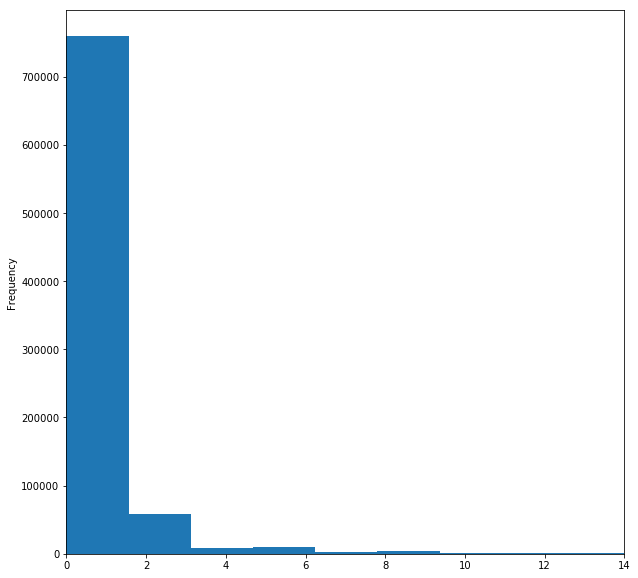

In [32]:
lv_res_review['cool'].plot.hist(bins=100, figsize=(10, 10)).set_xlim((0,14))

In [34]:
bins=[0,1,10,25,160]
labels=["cool1","cool10","coll20","cool25+"]

In [35]:
lv_res_review['cool_bin']= pd.cut(lv_res_review['cool'], bins, labels=labels)

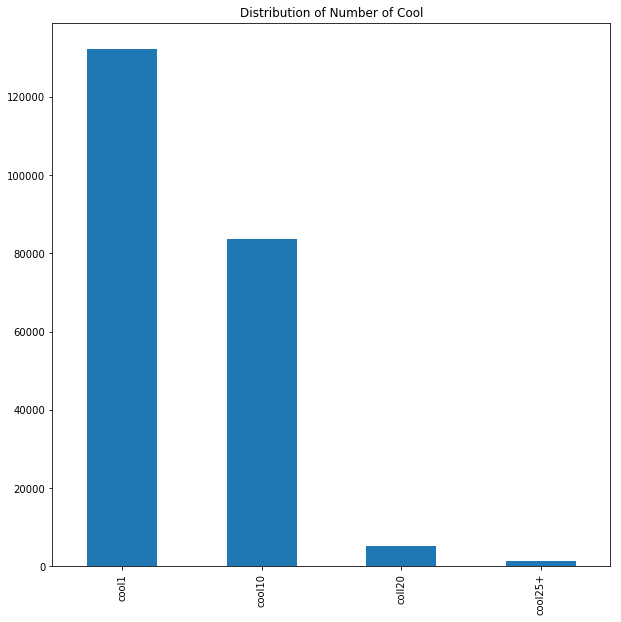

In [36]:
lv_res_review['cool_bin'].value_counts().plot(kind="bar",figsize=(10,10),title="Distribution of Number of Cool")

In [37]:
lv_res_review['cool_bin'].value_counts()

cool1      132340
cool10      83773
coll20       5294
cool25+      1232
Name: cool_bin, dtype: int64

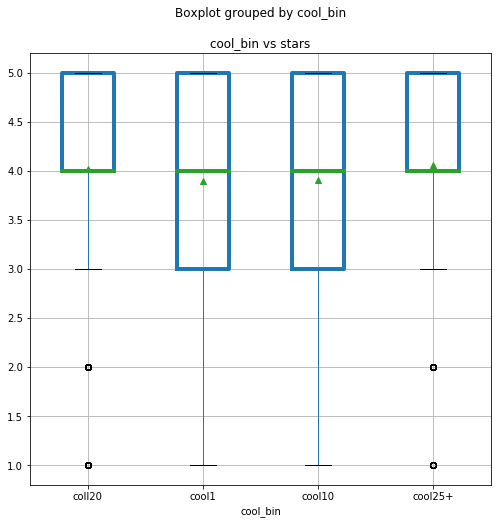

In [38]:
createBoxPlot(lv_res_review,"stars",'cool_bin')

## 2.2 Funny vs Ratings

In [39]:
lv_res_review['funny'].describe()

count    849883.000000
mean          0.504965
std           1.987249
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         154.000000
Name: funny, dtype: float64

In [40]:
lv_res_review['funny'].value_counts()

0      671211
1      104521
2       33199
3       14215
4        7789
5        4876
6        3211
7        2320
8        1673
9        1271
10        913
11        724
12        499
13        431
14        410
15        319
16        280
17        208
18        195
19        180
20        153
21        123
22        106
23        101
24         96
25         71
27         64
26         61
28         59
29         49
32         44
30         39
31         39
33         37
34         31
35         29
37         24
39         21
36         19
41         17
38         16
40         16
43         14
46         12
49         12
42         12
45         11
47         11
52          9
51          9
63          9
53          8
50          7
48          6
59          6
44          6
74          5
57          5
58          5
71          4
60          4
62          4
56          4
55          4
54          4
67          3
68          3
112         2
77          2
95          2
90          2
87    

(0, 14)

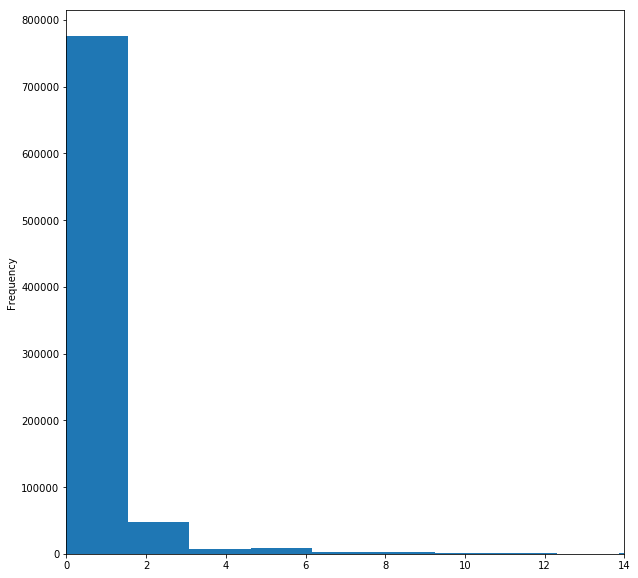

In [41]:
lv_res_review['funny'].plot.hist(bins=100, figsize=(10, 10)).set_xlim((0,14))

In [42]:
bins=[0,1,10,25,160]
labels=["funny1","funny10","funny20","funny25+"]

In [43]:
lv_res_review['funny_bin']= pd.cut(lv_res_review['funny'], bins, labels=labels)

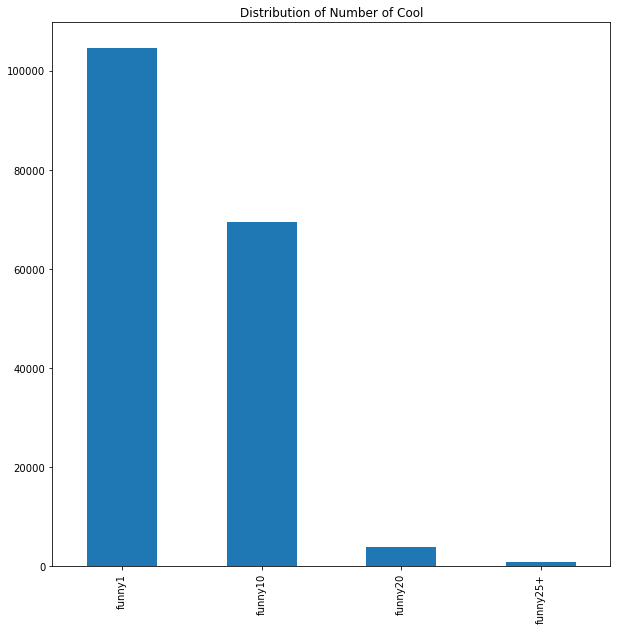

In [44]:
lv_res_review['funny_bin'].value_counts().plot(kind="bar",figsize=(10,10),title="Distribution of Number of Cool")

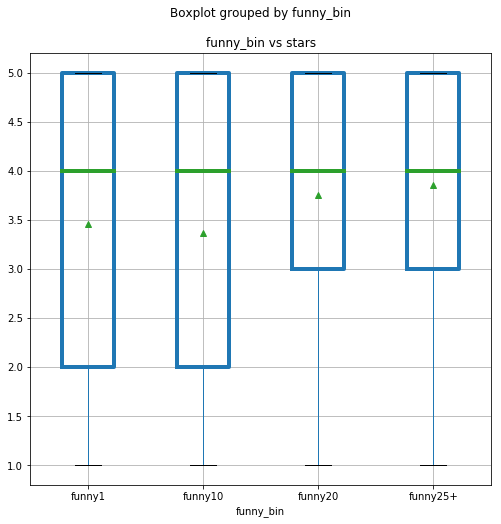

In [45]:
createBoxPlot(lv_res_review,"stars",'funny_bin')

## 2.3 Useful vs Ratings

In [46]:
lv_res_review['useful'].describe()

count    849883.000000
mean          1.012106
std           2.814845
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         168.000000
Name: useful, dtype: float64

In [47]:
lv_res_review['useful'].value_counts()

0      518608
1      173245
2       69509
3       32256
4       17198
5       10165
6        6649
7        4584
8        3415
9        2512
10       1927
11       1488
12       1173
13        992
14        772
15        617
16        540
17        474
18        404
19        340
20        328
22        240
21        220
23        195
24        193
25        171
27        135
26        132
28        116
29        104
30         98
32         89
31         82
33         70
34         61
36         55
37         49
39         49
38         44
35         41
40         41
43         40
42         31
41         30
45         26
44         26
48         22
46         21
50         20
47         17
51         17
49         14
55         13
63         11
56         11
52         10
68          9
64          9
53          9
54          9
58          9
65          7
57          7
99          6
60          6
74          6
61          5
62          5
69          5
73          4
92          4
66    

(0, 14)

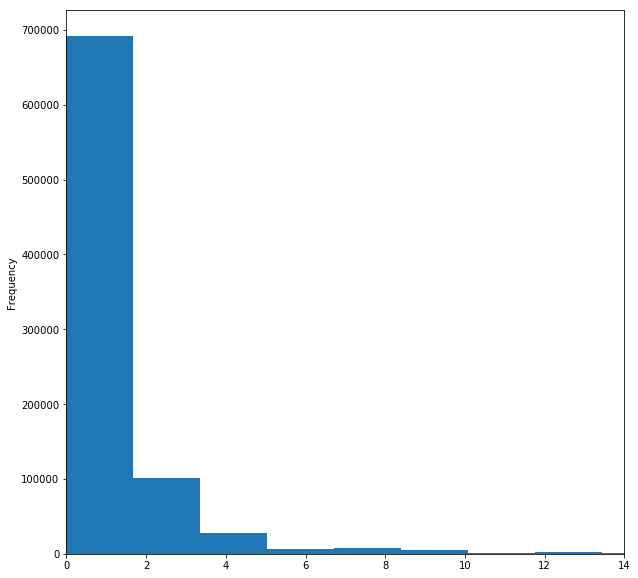

In [48]:
lv_res_review['useful'].plot.hist(bins=100, figsize=(10, 10)).set_xlim((0,14))

In [49]:
bins=[0,1,10,25,170]
labels=["useful1","useful10","useful20","useful25+"]

In [50]:
lv_res_review['useful_bin']= pd.cut(lv_res_review['useful'], bins, labels=labels)

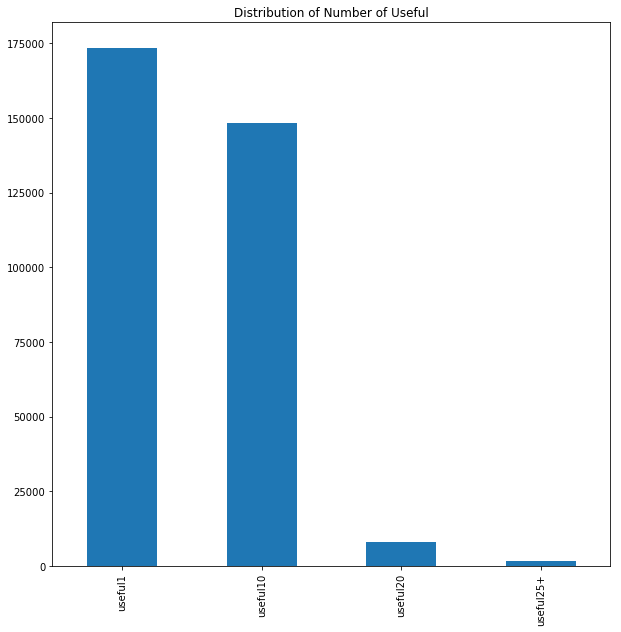

In [51]:
lv_res_review['useful_bin'].value_counts().plot(kind="bar",figsize=(10,10),title="Distribution of Number of Useful")

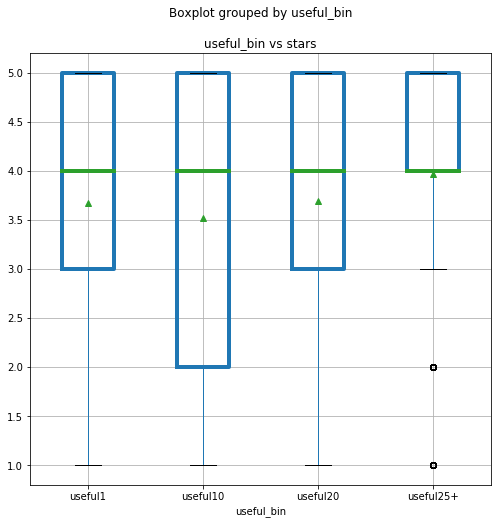

In [52]:
createBoxPlot(lv_res_review,"stars",'useful_bin')

## 3. K-Means Clustering and Principal Component Analysis

## 3.1 Preprocess the data

We will only use numerical data in this analysis since K-Means is mainly for numerica data.

Store the user list

In [154]:
userList=lv_res_user['user_id']

In [155]:
kmeans_data=lv_res_user.drop(['elite','friends','name','user_id','yelping_since'],axis=1)

In [156]:
feature_names=kmeans_data.columns.values

In [157]:
kmeans_data=np.array(kmeans_data)
type(kmeans_data)

numpy.ndarray

We need to normalize the data before performing K-Means Clustering

In [158]:
kmeans_data[0]

array([     3.8,   5174. ,    284. ,   5174. ,   5175. ,     78. ,
          299. ,   1435. ,   7829. ,   7397. ,    569. ,   1834. ,
        16856. ,    209. ,  16605. ,    272. ,  17019. ])

In [160]:
minMaxscaler =MinMaxScaler()
kmeans_data_norm = minMaxscaler.fit_transform(kmeans_data)

In [161]:
kmeans_data_norm[0]

array([ 0.7   ,  0.2762,  0.1323,  0.2762,  0.2589,  0.0348,  0.084 ,
        0.2263,  0.2351,  0.4023,  0.1011,  0.2314,  0.0863,  0.0343,
        0.1264,  0.0246,  0.0909])

## 3.2 Perform K-Means Clustering 

In [167]:
kMeans = KMeans(n_clusters=3, max_iter=500, verbose=1)

In [168]:
kMeans.fit(kmeans_data_norm)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3781.84026972
start iteration
done sorting
end inner loop
Iteration 1, inertia 3430.62925975
start iteration
done sorting
end inner loop
Iteration 2, inertia 3279.82993905
start iteration
done sorting
end inner loop
Iteration 3, inertia 3203.22593779
start iteration
done sorting
end inner loop
Iteration 4, inertia 3151.36553808
start iteration
done sorting
end inner loop
Iteration 5, inertia 3129.92146327
start iteration
done sorting
end inner loop
Iteration 6, inertia 3119.24843372
start iteration
done sorting
end inner loop
Iteration 7, inertia 3116.93110632
start iteration
done sorting
end inner loop
Iteration 8, inertia 3115.69993254
start iteration
done sorting
end inner loop
Iteration 9, inertia 3115.45923038
start iteration
done sorting
end inner loop
Iteration 10, inertia 3115.45843459
center shift 2.717665e-05 within tolerance 2.941643e-07
Initialization complete
start iteration
done sorti

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [169]:
kmeansPre=kMeans.predict(kmeans_data_norm)
centroids=kMeans.cluster_centers_

In [172]:
kmeans_data_norm[kmeansPre==0][0]

array([ 0.7   ,  0.2762,  0.1323,  0.2762,  0.2589,  0.0348,  0.084 ,
        0.2263,  0.2351,  0.4023,  0.1011,  0.2314,  0.0863,  0.0343,
        0.1264,  0.0246,  0.0909])

In [173]:
kmeans_data_norm[kmeansPre==1][0]

array([ 0.93  ,  0.0008,  0.0005,  0.0008,  0.0003,  0.    ,  0.0003,
        0.0017,  0.0002,  0.0011,  0.    ,  0.0001,  0.0003,  0.0028,
        0.    ,  0.025 ,  0.0002])

In [174]:
kmeans_data_norm[kmeansPre==2][0]

array([ 0.25  ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.0003,  0.0001])

## 3.3 Evaluate the Model

In [175]:
first_table=pd.DataFrame(centroids,columns=feature_names,index=range(3))

In [176]:
first_table.T

,0,1,2
average_stars,0.641657,0.896427,2.271727e-01
compliment_cool,0.000807,0.000271,6.294725e-06
compliment_cute,0.000476,0.000137,5.608098e-06
compliment_funny,0.000807,0.000271,6.294725e-06
compliment_hot,0.000569,0.000192,3.136609e-06
compliment_list,0.000185,0.000044,1.098372e-06
compliment_more,0.000419,0.000121,1.513781e-05
compliment_note,0.001027,0.000304,4.004584e-05
compliment_photos,0.000142,0.000058,7.771922e-07
compliment_plain,0.000754,0.000279,1.498663e-05


## 3.4 Principal component analysis

In [177]:
pca = decomposition.PCA(n_components=10)
pca.fit(kmeans_data_norm)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [178]:
pca.explained_variance_ratio_

array([ 0.9871,  0.0084,  0.0021,  0.0009,  0.0004,  0.0003,  0.0002,
        0.0001,  0.0001,  0.0001])

In [179]:
pca.components_

array([[-1.    , -0.0002, -0.0001, -0.0002, -0.0002, -0.    , -0.0001,
        -0.0001, -0.0001, -0.0002, -0.    , -0.0002, -0.0001, -0.0002,
        -0.0001, -0.0002, -0.0001],
       [-0.0006,  0.3543,  0.2023,  0.3543,  0.268 ,  0.1046,  0.1651,
         0.3658,  0.1173,  0.3411,  0.1162,  0.3009,  0.1918,  0.1273,
         0.2105,  0.2971,  0.2104],
       [-0.0001, -0.1135, -0.0776, -0.1135, -0.0993, -0.0506, -0.0639,
        -0.0688, -0.0834, -0.0925, -0.0715, -0.0862, -0.0842,  0.1117,
        -0.1083,  0.9394, -0.0715],
       [-0.    , -0.1061, -0.2344, -0.1061, -0.1924, -0.0973, -0.1091,
        -0.1483, -0.0539, -0.0231, -0.1114, -0.1256,  0.5301, -0.0312,
         0.4515,  0.0306,  0.569 ],
       [ 0.0001, -0.2149,  0.5863, -0.2149,  0.003 ,  0.3826,  0.2979,
        -0.1184,  0.0647, -0.404 ,  0.3138,  0.0102,  0.0859, -0.0749,
         0.1447,  0.061 ,  0.1051],
       [ 0.    ,  0.187 , -0.2899,  0.187 ,  0.1783, -0.0927,  0.0485,
        -0.4504,  0.3248, -0.3344,  0.0

In [180]:
feature_names

array(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer',
       'cool', 'fans', 'funny', 'review_count', 'useful'], dtype=object)

transform the data into a reduced dimension space

In [181]:
pca = decomposition.PCA(n_components=1)

In [182]:
kmeans_data_norm_transformed = pca.fit(kmeans_data_norm).transform(kmeans_data_norm)
kmeans_data_norm_transformed.shape

(307484, 1)

## 3.5 Perform K-Means Clustering Again

In [183]:
kMeans_pca = KMeans(n_clusters=3, max_iter=500, verbose=1)

In [184]:
kMeans_pca.fit(kmeans_data_norm_transformed)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3335.9778392
start iteration
done sorting
end inner loop
Iteration 1, inertia 2991.13489385
start iteration
done sorting
end inner loop
Iteration 2, inertia 2913.51840218
start iteration
done sorting
end inner loop
Iteration 3, inertia 2888.84605356
start iteration
done sorting
end inner loop
Iteration 4, inertia 2876.11501441
start iteration
done sorting
end inner loop
Iteration 5, inertia 2870.65986372
start iteration
done sorting
end inner loop
Iteration 6, inertia 2869.63938594
start iteration
done sorting
end inner loop
Iteration 7, inertia 2869.63015843
center shift 2.519239e-05 within tolerance 4.936177e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 3031.25646921
start iteration
done sorting
end inner loop
Iteration 1, inertia 2915.74457813
start iteration
done sorting
end inner loop
Iteration 2, inertia 2886.44035178
start iteration
done sorting

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [185]:
kmeansPcaPre=kMeans_pca.predict(kmeans_data_norm_transformed)
centroids=kMeans_pca.cluster_centers_

In [186]:
kmeans_data_norm_transformed[kmeansPcaPre==0][0]

array([-0.0128])

In [187]:
kmeans_data_norm_transformed[kmeansPcaPre==1][0]

array([-0.2424])

In [188]:
kmeans_data_norm_transformed[kmeansPcaPre==2][0]

array([ 0.4376])

## 3.6 Evaluate the Model

In [189]:
second_table=pd.DataFrame(centroids,columns=['PC1'],index=range(3))

In [190]:
second_table.T

,0,1,2
PC1,0.045965,-0.208796,0.460436
